In [3]:
import h5py
import numpy as np
from sklearn.utils import shuffle
np.random.seed(1807)

X_train = []
X_test = []

for filename in ["features_InceptionResNetV2.h5", "features_VGG19.h5", "features_Xception.h5"]:
    with h5py.File(filename, 'r') as h:
        X_train.append(np.array(h['train']))
        X_test.append(np.array(h['test']))
        y_train = np.array(h['label'])

X_train = np.concatenate(X_train, axis=1)              #数组拼接
X_test = np.concatenate(X_test, axis=1)

X_train, y_train = shuffle(X_train, y_train)

In [2]:
#图片处理显示
import pylab
from keras import backend as K
from keras.preprocessing import image
from keras.models import *
from keras.layers import *
from keras.utils import np_utils
from keras.applications import *
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K

np.random.seed(1807)
img = image.load_img('./test/15.jpg',target_size=(224, 224))
thisInput= image.img_to_array(img)
thisInput= np.expand_dims(thisInput, axis=0)
model = VGG19(weights='imagenet', include_top=False)


img1 = image.load_img('./test/12.jpg',target_size=(224, 224))
thisInput01= image.img_to_array(img1)
thisInput01= np.expand_dims(thisInput01, axis=0)

print(thisInput.shape)


Using TensorFlow backend.
/home/alex/prog/anaconda3/envs/tensor36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


(1, 224, 224, 3)


In [3]:
intermediate_tensor_function = K.function([model.layers[0].input],[model.layers[2].output])


In [12]:
f1 = intermediate_tensor_function([thisInput])[0]

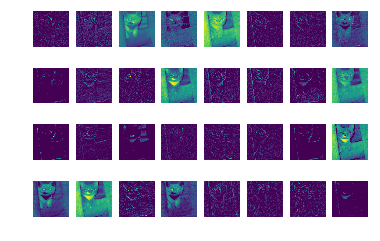

In [30]:

for _ in range(32):
            show_img = f1[:, :, :, _]
            show_img.shape = [224,224]
            plt.subplot(4, 8, _ + 1)
            plt.imshow(show_img)
            plt.axis('off')
            
plt.show()
pylab.show()

In [5]:
f01 = intermediate_tensor_function([thisInput01])[0]

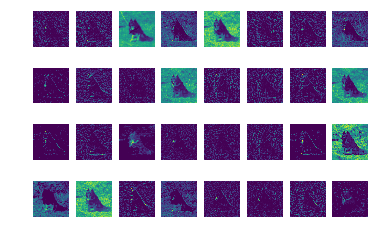

In [6]:

for _ in range(32):
            show_img = f01[:, :, :, _]
            show_img.shape = [224,224]
            plt.subplot(4, 8, _ + 1)
            plt.imshow(show_img)
            plt.axis('off')
            
plt.show()
pylab.show()

In [2]:
import keras
from keras.models import *
from keras.layers import *
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.utils import plot_model

%matplotlib inline

#记录accuracy与loss，以便可视化
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()
        
np.random.seed(1807)

input_tensor = Input(X_train.shape[1:])
x = Dropout(0.5)(input_tensor)
x = Dense(1, activation='sigmoid')(x)
model = Model(input_tensor, x)

#model.summary()　　　　　　　　　　　　　　　　# new add
model.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = LossHistory()                    # add

Using TensorFlow backend.
/home/alex/prog/anaconda3/envs/tensor36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/alex/prog/anaconda3/envs/tensor36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Train on 20000 samples, validate on 5000 samples
Epoch 1/8
20000/20000 [==============================] - 1s 28us/step - loss: 0.1068 - acc: 0.9634 - val_loss: 0.0194 - val_acc: 0.9948
Epoch 2/8
20000/20000 [==============================] - 0s 23us/step - loss: 0.0236 - acc: 0.9931 - val_loss: 0.0160 - val_acc: 0.9958
Epoch 3/8
20000/20000 [==============================] - 0s 23us/step - loss: 0.0182 - acc: 0.9941 - val_loss: 0.0146 - val_acc: 0.9956
Epoch 4/8
20000/20000 [==============================] - 0s 24us/step - loss: 0.0158 - acc: 0.9953 - val_loss: 0.0161 - val_acc: 0.9946
Epoch 5/8
20000/20000 [==============================] - 1s 26us/step - loss: 0.0165 - acc: 0.9953 - val_loss: 0.0152 - val_acc: 0.9958
Epoch 6/8
20000/20000 [==============================] - 1s 26us/step - loss: 0.0167 - acc: 0.9950 - val_loss: 0.0145 - val_acc: 0.9962
Epoch 7/8
20000/20000 [==============================] - 0s 24us/step - loss: 0.0135 - acc: 0.9960 - val_loss: 0.0158 - val_acc: 0.9950

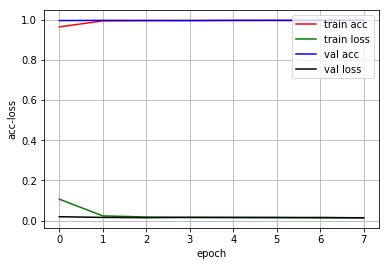

In [3]:
model.fit(X_train, y_train, batch_size=64, verbose=1, epochs=8, validation_split=0.2,callbacks=[history])
history.loss_plot('epoch')

In [4]:

#try to change the dropout rate
import keras
from keras.models import *
from keras.layers import *
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.utils import plot_model

%matplotlib inline

#记录accuracy与loss，以便可视化
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()
        
                   # add

In [7]:
np.random.seed(1807)

input_tensor = Input(X_train.shape[1:])
x = Dropout(0.8)(input_tensor)
x = Dense(1, activation='sigmoid')(x)
model = Model(input_tensor, x)

#model.summary()　　　　　　　　　　　　　　　　# new add
model.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = LossHistory() 

Train on 20000 samples, validate on 5000 samples
Epoch 1/8
20000/20000 [==============================] - 1s 33us/step - loss: 0.1986 - acc: 0.9435 - val_loss: 0.0188 - val_acc: 0.9948
Epoch 2/8
20000/20000 [==============================] - 1s 27us/step - loss: 0.0332 - acc: 0.9896 - val_loss: 0.0161 - val_acc: 0.9950
Epoch 3/8
20000/20000 [==============================] - 1s 27us/step - loss: 0.0299 - acc: 0.9916 - val_loss: 0.0148 - val_acc: 0.9952
Epoch 4/8
20000/20000 [==============================] - 1s 27us/step - loss: 0.0237 - acc: 0.9930 - val_loss: 0.0155 - val_acc: 0.9952
Epoch 5/8
20000/20000 [==============================] - 1s 27us/step - loss: 0.0249 - acc: 0.9935 - val_loss: 0.0148 - val_acc: 0.9964
Epoch 6/8
20000/20000 [==============================] - 1s 27us/step - loss: 0.0254 - acc: 0.9926 - val_loss: 0.0149 - val_acc: 0.9960
Epoch 7/8
20000/20000 [==============================] - 1s 27us/step - loss: 0.0245 - acc: 0.9940 - val_loss: 0.0147 - val_acc: 0.9964

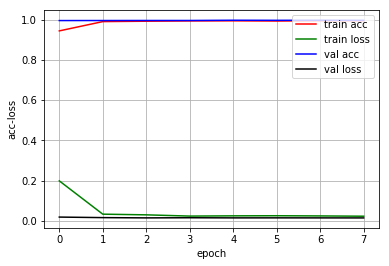

In [8]:
model.fit(X_train, y_train, batch_size=64, verbose=1, epochs=8, validation_split=0.2,callbacks=[history])
history.loss_plot('epoch')

In [5]:
#dropout=0.2时
#############################
np.random.seed(1807)

input_tensor = Input(X_train.shape[1:])
x = Dropout(0.2)(input_tensor)
x = Dense(1, activation='sigmoid')(x)
model = Model(input_tensor, x)

#model.summary()　　　　　　　　　　　　　　　　# new add
model.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = LossHistory() 

Train on 20000 samples, validate on 5000 samples
Epoch 1/8
20000/20000 [==============================] - 5s 241us/step - loss: 0.0786 - acc: 0.9718 - val_loss: 0.0207 - val_acc: 0.9940
Epoch 2/8
20000/20000 [==============================] - 1s 26us/step - loss: 0.0193 - acc: 0.9942 - val_loss: 0.0167 - val_acc: 0.9944
Epoch 3/8
20000/20000 [==============================] - 1s 26us/step - loss: 0.0152 - acc: 0.9949 - val_loss: 0.0152 - val_acc: 0.9954
Epoch 4/8
20000/20000 [==============================] - 1s 26us/step - loss: 0.0131 - acc: 0.9961 - val_loss: 0.0182 - val_acc: 0.9936
Epoch 5/8
20000/20000 [==============================] - 1s 26us/step - loss: 0.0127 - acc: 0.9964 - val_loss: 0.0172 - val_acc: 0.9950
Epoch 6/8
20000/20000 [==============================] - 1s 26us/step - loss: 0.0111 - acc: 0.9968 - val_loss: 0.0150 - val_acc: 0.9960
Epoch 7/8
20000/20000 [==============================] - 1s 26us/step - loss: 0.0094 - acc: 0.9973 - val_loss: 0.0181 - val_acc: 0.994

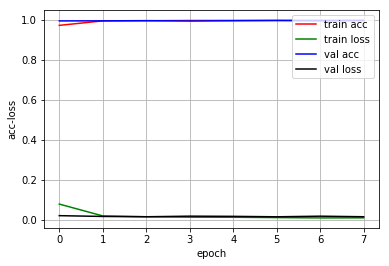

In [6]:
model.fit(X_train, y_train, batch_size=64, verbose=1, epochs=8, validation_split=0.2,callbacks=[history])
history.loss_plot('epoch')

Train on 19962 samples, validate on 4991 samples
Epoch 1/8
19962/19962 [==============================] - 2s 102us/step - loss: 0.1508 - acc: 0.9503 - val_loss: 0.0174 - val_acc: 0.9944
Epoch 2/8
19962/19962 [==============================] - 0s 23us/step - loss: 0.0242 - acc: 0.9923 - val_loss: 0.0152 - val_acc: 0.9956
Epoch 3/8
19962/19962 [==============================] - 0s 23us/step - loss: 0.0189 - acc: 0.9940 - val_loss: 0.0144 - val_acc: 0.9962
Epoch 4/8
19962/19962 [==============================] - 0s 23us/step - loss: 0.0162 - acc: 0.9953 - val_loss: 0.0136 - val_acc: 0.9958
Epoch 5/8
19962/19962 [==============================] - 0s 23us/step - loss: 0.0149 - acc: 0.9958 - val_loss: 0.0131 - val_acc: 0.9962
Epoch 6/8
19962/19962 [==============================] - 0s 23us/step - loss: 0.0132 - acc: 0.9962 - val_loss: 0.0138 - val_acc: 0.9958
Epoch 7/8
19962/19962 [==============================] - 0s 23us/step - loss: 0.0128 - acc: 0.9961 - val_loss: 0.0130 - val_acc: 0.996

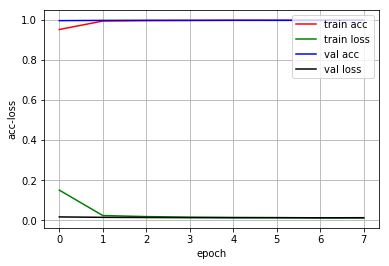

In [3]:
'''#这是对删除异常值后，进行的尝试。最终得分略低
model.fit(X_train, y_train, batch_size=128, verbose=1, epochs=8, validation_split=0.2,callbacks=[history])
history.loss_plot('epoch')
'''

In [ ]:
#这是使用tensorflow的方式，数据没有新的处理

print(model.summary())
log_filepath='/home/alex/prog/KaggleCat/tb'
#使用tensorboard可视化
from keras.callbacks import LearningRateScheduler, TensorBoard
model.fit(X_train, y_train, batch_size=64, verbose=1, epochs=8, validation_split=0.2,callbacks=[TensorBoard(log_dir=log_filepath)])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4096)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4097      
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 5000 samples


In [41]:
#参考演示，测试用
'''
print(model.summary())
log_filepath='/home/alex/prog/KaggleCat/tb'
#使用tensorboard可视化
from keras.callbacks import LearningRateScheduler, TensorBoard
epoch=160  #测试用
def scheduler(epoch):
    learning_rate_init = 0.02
    if epoch >= 80:
        learning_rate_init = 0.01
    if epoch >= 150:
        learning_rate_init = 0.004
    return learning_rate_init

tb_cb = TensorBoard(log_dir=log_filepath, histogram_freq=0)
change_lr = LearningRateScheduler(scheduler)
cbks = [change_lr,tb_cb]

model.fit(X_train, y_train, batch_size=128, verbose=1, epochs=8, validation_split=0.2,callbacks=cbks)
'''

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 4096)              0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 4096)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 4097      
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 5000 samples
Epoch 1/8
20000/20000 [==============================] - 1s 31us/step - loss: 1.6057 - acc: 0.5107 - val_loss: 0.6883 - val_acc: 0.6704
Epoch 2/8
20000/20000 [==============================] - 0s 22us/step - loss: 0.8829 - acc: 0.6804 - val_loss: 0.2947 - val_acc: 0.8856
Epoch 3/8
20000/20000 [==============================] - 0s 22us/step - loss: 

In [9]:
model.save('model.h5')

In [4]:
y_pred = model.predict(X_test, verbose=1)
y_pred = y_pred.clip(min=0.005, max=0.995)

12500/12500 [==============================] - 0s 8us/step


In [5]:
import pandas as pd
from keras.preprocessing.image import *

df = pd.read_csv("sample_submission.csv")

image_size = (224, 224)
gen = ImageDataGenerator()
test_generator = gen.flow_from_directory("testS", image_size, shuffle=False, 
                                         batch_size=16, class_mode=None)

for i, fname in enumerate(test_generator.filenames):
    index = int(fname[fname.rfind('/')+1:fname.rfind('.')])
    df.set_value(index-1, 'label', y_pred[i])

df.to_csv('pred.csv', index=None)
df.head(50)

Found 12500 images belonging to 1 classes.


/home/alex/prog/anaconda3/envs/tensor36/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


,id,label
0,1,0.995000
1,2,0.995000
2,3,0.995000
3,4,0.995000
4,5,0.005000
5,6,0.005000
6,7,0.005000
7,8,0.005000
8,9,0.005000
9,10,0.005000


In [6]:
import pandas as pd
from keras.preprocessing.image import *

df = pd.read_csv("sample_submission.csv")

image_size = (224, 224)
gen = ImageDataGenerator()
test_generator = gen.flow_from_directory("testS", image_size, shuffle=False, 
                                         batch_size=16, class_mode=None)

for i, fname in enumerate(test_generator.filenames):
    index = int(fname[fname.rfind('/')+1:fname.rfind('.')])
    df.set_value(index-1, 'label', y_pred[i])

df.to_csv('pred01.csv', index=None)
df.head(10)

Found 12500 images belonging to 1 classes.


/home/alex/prog/anaconda3/envs/tensor36/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


,id,label
0,1,0.995
1,2,0.995
2,3,0.995
3,4,0.995
4,5,0.005
5,6,0.005
6,7,0.005
7,8,0.005
8,9,0.005
9,10,0.005
